In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, MiniBatchKMeans
from sklearn.decomposition import  PCA
import os
from IPython import display

# Analyse des log system du réseau wifi de l'université de Dartmouth



In [28]:
display.IFrame("https://www.google.com/maps/embed?pb=!1m18!1m12!1m3!1d2127263.558026433!2d-73.37014373387724!3d42.578740841814614!2m3!1f0!2f0!3f0!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x4cb4c9e7a12c70ef%3A0x333d74a19cbeb03b!2sDartmouth+College+Office+of+Admissions!5e0!3m2!1sfr!2sfr!4v1507262745643", width=900, height=500 )

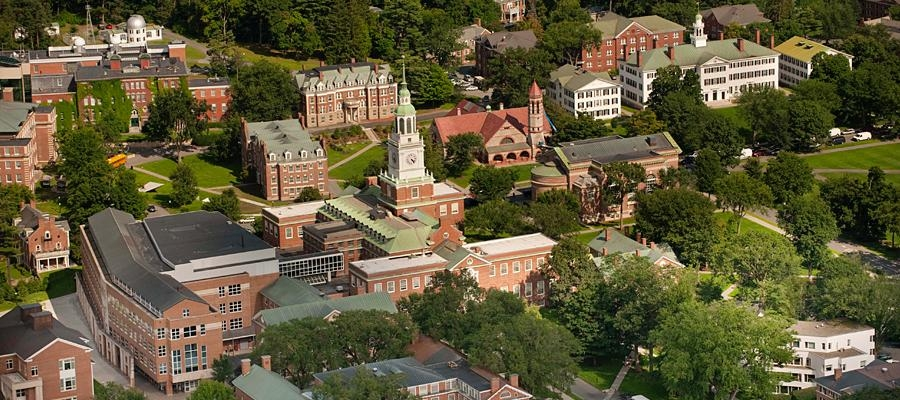

In [13]:
display.Image('JS09_Campus_Aerial001.jpg')

In [21]:
display.IFrame('Dartmouth-College-campus-map.pdf', width=900, height=800)

# Objectif

Dans le cadre de son activité de recherche, David Kotz du collège Dartmmouth a collecté les logs du réseau wifi de l'université entre 2001 et 2004. Ces logs on été annonymisées et pré-traitées.

* Le premier champ correspond à un timestamp unix. C'est une donnée ajouté puisque les bornes wifi ne communiquent pas l'année dans la date qu'elles enregistrent.

* Le deuxième champ est la date et l'heure de l'enregistrement.

* le troisième champ est le nom du serveur d'enregistrement (`ns1.dartmouth.edu`) des logs et le quatrième le nom de la station qui a produit la log. Après annonymisation, les deux noms ont été converti.

In [19]:
def loadData(filePath):
    with open(filePath) as f:
        data = f.read().split('\n')
    elements = []
    for line in data:
        el = line.split()
        try:
            elements.append([el[0],el[4], ' '.join(el[7:])])
        except:
            pass
    
    #Build Dataframe
    df = pd.DataFrame(elements, columns=['timestamp','AP','message'])
    df.drop_duplicates(inplace=True)
    
    df['Disassociating'] = df.message.str.extract(r'Disassociating (\w+)', expand=False)
    df['Station'] = df.message.str.extract(r'Station (\w+)', expand=False)
    df['Action'] = df.message.str.extract(r'Station \w+ (\w+)', expand=False)
    
    df.ix[ ~ df.Disassociating.isnull(),'Station'] = df.ix[ ~ df.Disassociating.isnull(),'Disassociating']
    df.ix[ ~ df.Disassociating.isnull(),'Action'] = 'Disassociating'
    
    df['Deauthenticating'] = df.message.str.extract(r'Deauthenticating (\w+)', expand=False)
    df.ix[ ~ df.Deauthenticating.isnull(),'Station'] = df.ix[ ~ df.Deauthenticating.isnull(),'Deauthenticating']
    df.ix[ ~ df.Deauthenticating.isnull(),'Action'] = 'Deauthenticating'
    
    df.drop(['Disassociating','Deauthenticating'], axis=1, inplace=True)
    
    
    df['BuildingType'] = df.AP.str.extract(r'(\w+)Bldg', expand=False)
    df['BuildingNumber'] = df.AP.str.extract(r'Bldg(\d+)', expand=False)
    df['APnumber'] = df.AP.str.extract(r'AP(\d+)', expand=False)
    df['BuildingId'] = df.BuildingType + df.BuildingNumber
    return df

In [6]:
def parsingLogs(fileFolder):
    paths = [x for x in os.listdir(fileFolder) if x.endswith('.log') ]
    paths = [os.path.join(fileFolder,x) for x in paths]
    
    # create dataframe
    df = pd.DataFrame()
    
    #append
    for p in paths:
        print("Processing: %s" % p)
        df = df.append(loadData(p))
    
    #Linking stations and Aps
    df.ix[ ~df.Station.isnull(), 'Ap_Station_Link'] = 1
    
    #transform index
    df['timestamp'] = pd.to_datetime(df.timestamp, unit='s')
    df.index = df.timestamp
    
    return df

In [7]:
df = parsingLogs("syslog-v3.3/")

Processing: syslog-v3.3/20020101.log
Processing: syslog-v3.3/20020102.log
Processing: syslog-v3.3/20020103.log
Processing: syslog-v3.3/20020104.log
Processing: syslog-v3.3/20020105.log
Processing: syslog-v3.3/20020107.log
Processing: syslog-v3.3/20020108.log
Processing: syslog-v3.3/20020109.log
Processing: syslog-v3.3/20020110.log
Processing: syslog-v3.3/20020111.log
Processing: syslog-v3.3/20020112.log
Processing: syslog-v3.3/20020114.log
Processing: syslog-v3.3/20020115.log
Processing: syslog-v3.3/20020116.log
Processing: syslog-v3.3/20020117.log
Processing: syslog-v3.3/20020118.log
Processing: syslog-v3.3/20020119.log
Processing: syslog-v3.3/20020120.log
Processing: syslog-v3.3/20020121.log
Processing: syslog-v3.3/20020122.log
Processing: syslog-v3.3/20020123.log
Processing: syslog-v3.3/20020124.log
Processing: syslog-v3.3/20020125.log
Processing: syslog-v3.3/20020126.log
Processing: syslog-v3.3/20020127.log
Processing: syslog-v3.3/20020128.log
Processing: syslog-v3.3/20020129.log
P

Processing: syslog-v3.3/20020813.log
Processing: syslog-v3.3/20020814.log
Processing: syslog-v3.3/20020815.log
Processing: syslog-v3.3/20020816.log
Processing: syslog-v3.3/20020817.log
Processing: syslog-v3.3/20020818.log
Processing: syslog-v3.3/20020819.log
Processing: syslog-v3.3/20020820.log
Processing: syslog-v3.3/20020821.log
Processing: syslog-v3.3/20020822.log
Processing: syslog-v3.3/20020823.log
Processing: syslog-v3.3/20020824.log
Processing: syslog-v3.3/20020825.log
Processing: syslog-v3.3/20020826.log
Processing: syslog-v3.3/20020827.log
Processing: syslog-v3.3/20020828.log
Processing: syslog-v3.3/20020829.log
Processing: syslog-v3.3/20020830.log
Processing: syslog-v3.3/20020831.log
Processing: syslog-v3.3/20020901.log
Processing: syslog-v3.3/20020902.log
Processing: syslog-v3.3/20020903.log
Processing: syslog-v3.3/20020904.log
Processing: syslog-v3.3/20020905.log
Processing: syslog-v3.3/20020906.log
Processing: syslog-v3.3/20020907.log
Processing: syslog-v3.3/20020908.log
P

In [8]:
len(df)

25465732

In [10]:
df.to_csv("syslog_2002.csv")

In [9]:
df.head()

,timestamp,AP,message,Station,Action,BuildingType,BuildingNumber,APnumber,BuildingId,Ap_Station_Link
timestamp,,,,,,,,,,
2002-01-01 05:00:05,2002-01-01 05:00:05,ResBldg71AP1,Station 00045adc7088 Reassociated,00045adc7088,Reassociated,Res,71,1,Res71,1.0
2002-01-01 05:00:42,2002-01-01 05:00:42,AthlBldg3AP2,Station 00022d0acd45 Authenticated,00022d0acd45,Authenticated,Athl,3,2,Athl3,1.0
2002-01-01 05:00:42,2002-01-01 05:00:42,AthlBldg3AP2,Station 00022d0acd45 Associated,00022d0acd45,Associated,Athl,3,2,Athl3,1.0
2002-01-01 05:01:00,2002-01-01 05:01:00,ResBldg92AP3,Station 00045adc7088 Reassociated,00045adc7088,Reassociated,Res,92,3,Res92,1.0
2002-01-01 05:01:23,2002-01-01 05:01:23,AthlBldg3AP2,Station 00022d0acd45 Authenticated,00022d0acd45,Authenticated,Athl,3,2,Athl3,1.0
